[Data Source](http://deepyeti.ucsd.edu/jianmo/amazon/index.html) 

In [1]:
pip install pyarrow

     |████████████████████████████████| 17.3 MB 12.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install feather-format

  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2453 sha256=d04e6b5351b8c49a3ee7f34bd4d340fcffdc1996a643ee2912b39bf64b801ff9
  Stored in directory: /home/ec2-user/.cache/pip/wheels/9d/90/64/88411837e80bb520d15ae395f39359a5413e7a00ae63397e10
Successfully built feather-format
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import json
import gzip
from urllib.request import urlopen
import feather 

In [62]:
# function below prepares data by unzipping, dropping several columns that are full of nulls or unnecessary data for this
# particular analysis
def data_prep(data_name):
        
    file_name = f'{data_name}.json.gz'
    ### load the meta data
    data = []
    with gzip.open(file_name) as f:
        for l in f:
            data.append(json.loads(l.strip()))

    # convert list into pandas dataframe
    df = pd.DataFrame.from_dict(data)

    # drop columns containing nulls
    df = df.drop(columns=['vote', 'reviewTime', 'asin', 'reviewerID', 'image', 'verified', 'style', 'reviewText', 'summary'])

    #print current shapes
    print(df.shape)
    
    feather_name = f'{data_name}.feather'

    # save in feather format
    df.to_feather(feather_name)


    #Convert unix timestamps to datetime.
    df['datetime'] = pd.to_datetime(df['unixReviewTime'],unit='s')
    
    # extract time-specific elements from datetime for further analysis    
    df['Weekday'] = df['datetime'].dt.dayofweek
    df['Month'] = df['datetime'].dt.month
    df['Day'] = df['datetime'].dt.day
    df['Year'] = df['datetime'].dt.year
    df['Quarter'] = df['datetime'].dt.quarter

## deprecated - previously used to set datetime as the index and convert based on the index

#     #Set the 'datetime' field to be the index.
#     df.set_index('datetime',inplace=True)

#     #Extract the month from the index.
#     df['Month'] = df.index.month

#     #Extract the year from the index.
#     df['Year'] = df.index.year
    
#     df['Day'] = df.index.day



    # shape should be 4-5+ more columsn depending on how many features you added above
    print(df.shape)
    
    return df

## Compare the Annual Growth of reviews over several product catagories

- All Beauty
- Prime Pantry
- Software
- Appliances
- Amazon Fashion
- Musical Instruments

In [43]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/All_Beauty.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Prime_Pantry.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Software.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Appliances.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/AMAZON_FASHION.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Musical_Instruments.json.gz

--2020-09-23 15:18:32--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/All_Beauty.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47350910 (45M) [application/octet-stream]
Saving to: ‘All_Beauty.json.gz’

All_Beauty.json.gz  100%[===================>]  45.16M  19.4MB/s    in 2.3s    

2020-09-23 15:18:34 (19.4 MB/s) - ‘All_Beauty.json.gz’ saved [47350910/47350910]

--2020-09-23 15:18:35--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Prime_Pantry.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45435146 (43M) [application/octet-stream]
Saving to: ‘Prime_Pantry.json.gz’

Prime_Pantry.json.g 100%[===================>]  43.33M  19.1MB/s    in 2.3s    



(371345, 3)
(371345, 9)


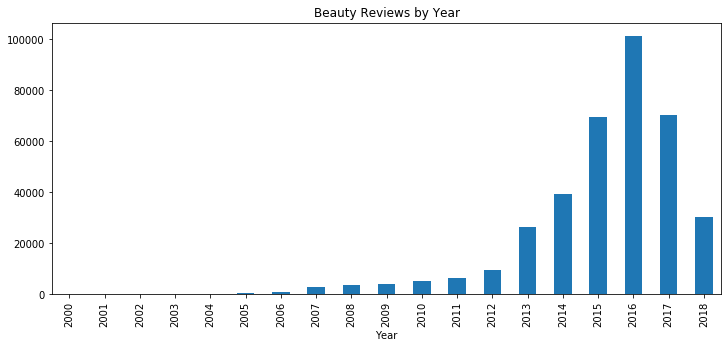

In [97]:
df_beauty = data_prep('All_Beauty')

plt.subplots(figsize = (12,5)) 
plt.title('Beauty Reviews by Year')
df_beauty.groupby(['Year']).size().plot(kind='bar');

(471614, 3)
(471614, 9)


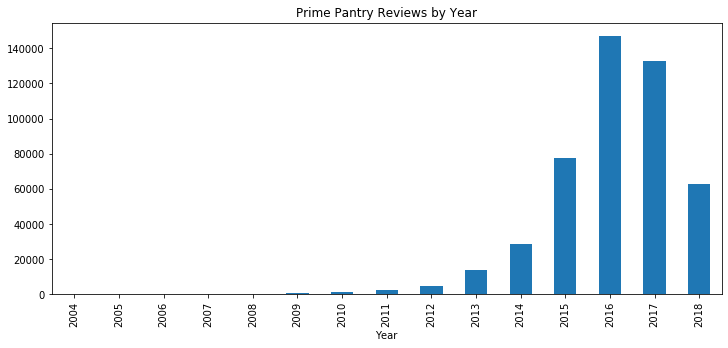

In [98]:
df_prime_pantry = data_prep('Prime_Pantry')

plt.subplots(figsize = (12,5)) 
plt.title('Prime Pantry Reviews by Year')
df_prime_pantry.groupby(['Year']).size().plot(kind='bar');

(459436, 3)
(459436, 9)


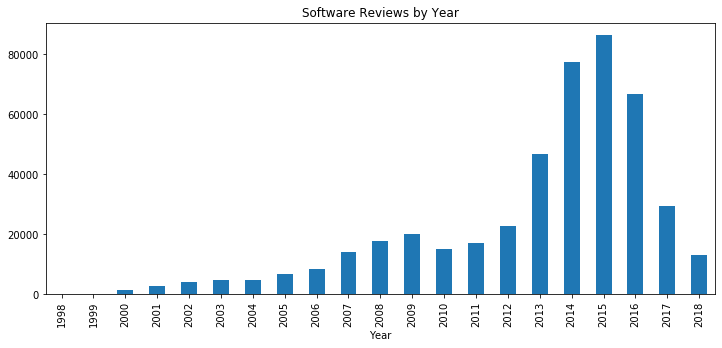

In [99]:
df_software = data_prep('Software')

plt.subplots(figsize = (12,5)) 
plt.title('Software Reviews by Year')
df_software.groupby(['Year']).size().plot(kind='bar');

(602777, 3)
(602777, 9)


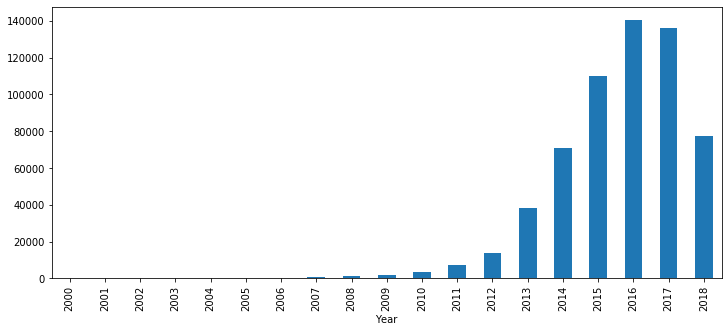

In [66]:
df_applicances = data_prep('Appliances')

plt.subplots(figsize = (12,5)) 
plt.title('Appliances Reviews by Year')
df_applicances.groupby(['Year']).size().plot(kind='bar');

(883636, 3)
(883636, 9)


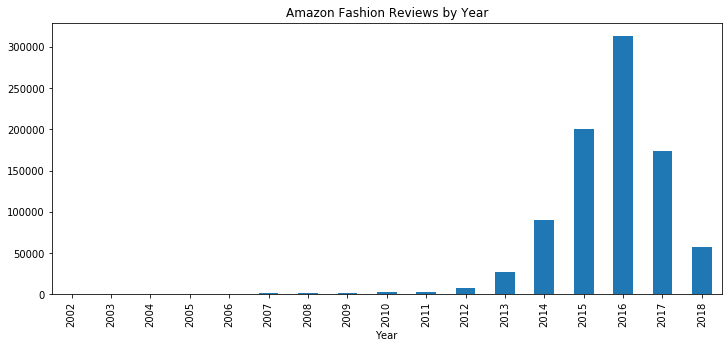

In [100]:
df_amazon_fashion = data_prep('AMAZON_FASHION')

plt.subplots(figsize = (12,5)) 
plt.title('Amazon Fashion Reviews by Year')
df_amazon_fashion.groupby(['Year']).size().plot(kind='bar');

(1512530, 3)
(1512530, 9)


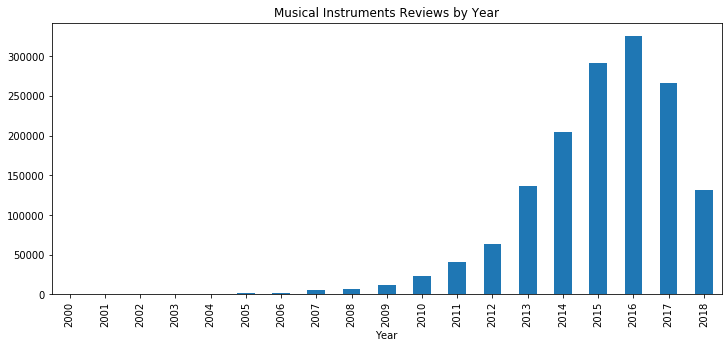

In [101]:
df_musical_instruments = data_prep('Musical_Instruments')

plt.subplots(figsize = (12,5)) 
plt.title('Musical Instruments Reviews by Year')
df_musical_instruments.groupby(['Year']).size().plot(kind='bar');

### Of Interest:
Several interesting things from looking at a simple annual growth rate:
- Different starting years ranging from 1998-2002
- The difference in growth rates is remarkable. Beauty was stable incremental growth from 2007-11 and then explosive growth thereafter. Though I suspect it was explosive growth in that time period as well - it just doesn't appear so relative to the successive year. 
- Amazon fashion clear appears to have taken advantage of the advertising and placement advantage they have on their own site. Their growth more than doubled for 4 years straight. 
- Software is an interesting difference from the rest. Incremental growth most years outside of 2 years with explosive growth. 


## Compare the Quarterly Flow of reviews over the same product catagories
- All Beauty
- Prime Pantry
- Software
- Appliances
- Amazon Fashion
- Musical Instruments

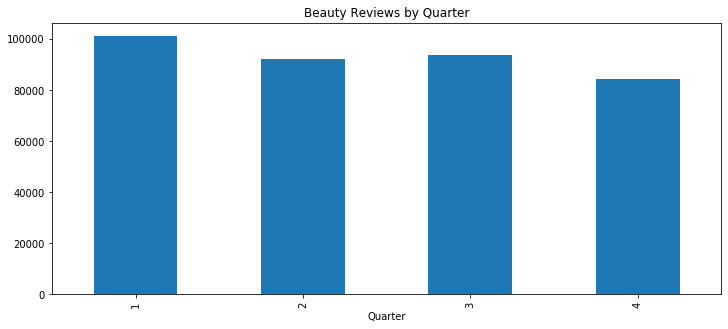

In [91]:
plt.subplots(figsize = (12,5)) 
plt.title('Beauty Reviews by Quarter')
df_beauty.groupby(['Quarter']).size().plot(kind='bar');

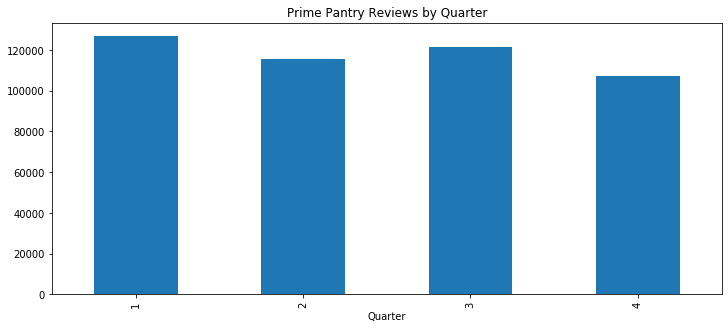

In [92]:
plt.subplots(figsize = (12,5)) 
plt.title('Prime Pantry Reviews by Quarter')
df_prime_pantry.groupby(['Quarter']).size().plot(kind='bar');

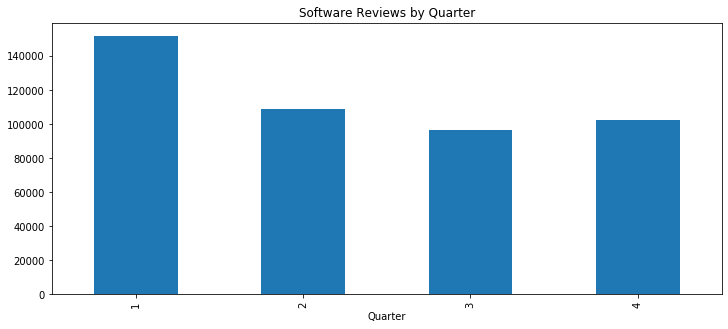

In [93]:
plt.subplots(figsize = (12,5)) 
plt.title('Software Reviews by Quarter')
df_software.groupby(['Quarter']).size().plot(kind='bar');

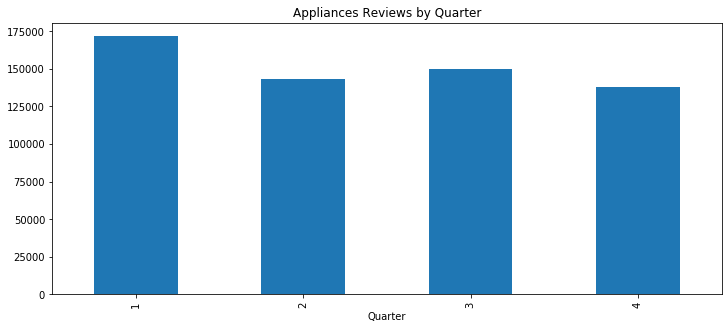

In [94]:
plt.subplots(figsize = (12,5)) 
plt.title('Appliances Reviews by Quarter')
df_applicances.groupby(['Quarter']).size().plot(kind='bar');

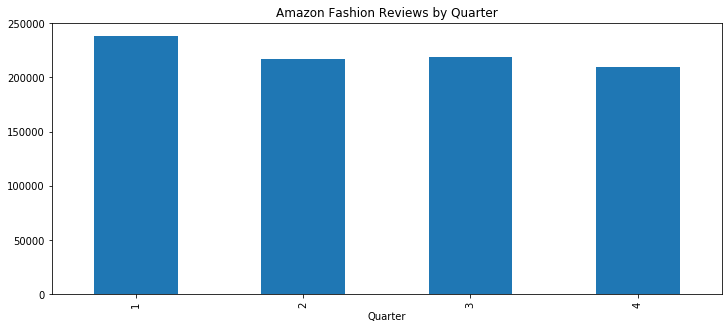

In [95]:
plt.subplots(figsize = (12,5)) 
plt.title('Amazon Fashion Reviews by Quarter')
df_amazon_fashion.groupby(['Quarter']).size().plot(kind='bar');

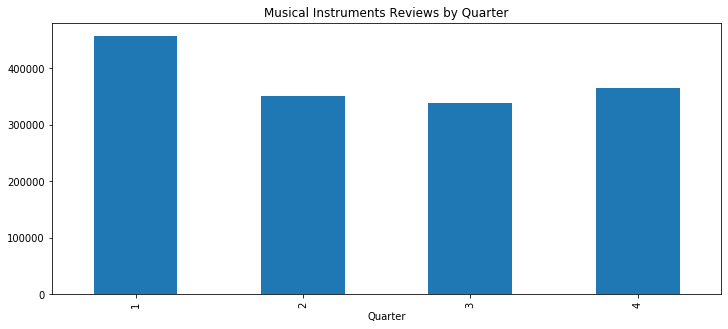

In [96]:
plt.subplots(figsize = (12,5)) 
plt.title('Musical Instruments Reviews by Quarter')
df_musical_instruments.groupby(['Quarter']).size().plot(kind='bar');

### Of Interest:
Some interesting observations:
- Far less variation from the annual distribution, but's that generally to be expected when we lump data points into fewer catagories. 
- Musical Instruments, Applicances, and especially Software stick out at with a greater dip after the first quarter. 

**Hypothesis:** There's a sudden spike in January when reviews are likely posted after the surge of purchases and gift-giving in the holiday season. Next, I'll break it down by month. 


## Compare the Monthly Flow of reviews over the same product catagories
- All Beauty
- Prime Pantry
- Software
- Appliances
- Amazon Fashion
- Musical Instruments

**Note Hypothesis above**

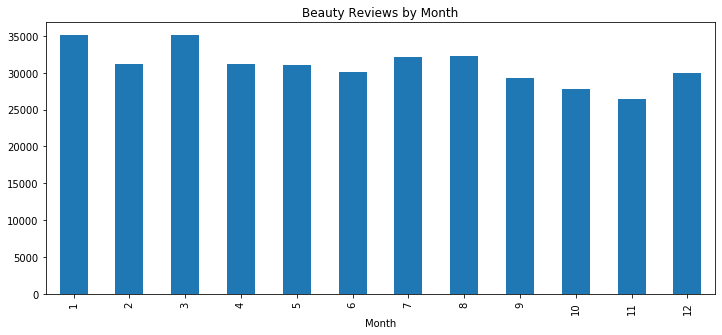

In [85]:
plt.subplots(figsize = (12,5)) 
plt.title('Beauty Reviews by Month')
df_beauty.groupby(['Month']).size().plot(kind='bar');

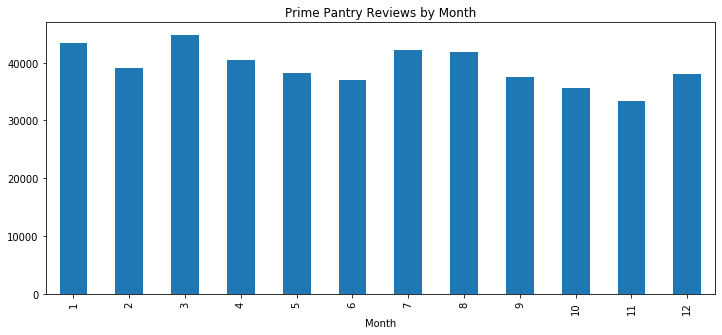

In [86]:
plt.subplots(figsize = (12,5)) 
plt.title('Prime Pantry Reviews by Month')
df_prime_pantry.groupby(['Month']).size().plot(kind='bar');

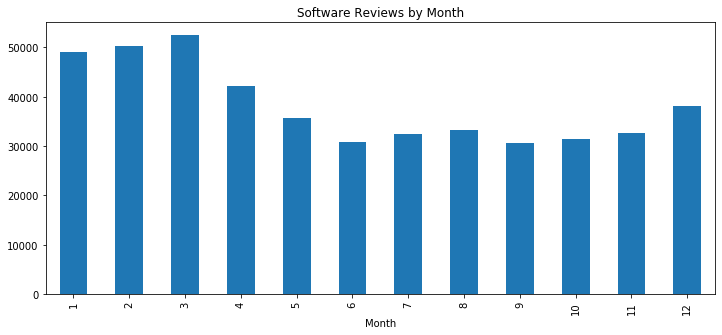

In [87]:
plt.subplots(figsize = (12,5)) 
plt.title('Software Reviews by Month')
df_software.groupby(['Month']).size().plot(kind='bar');

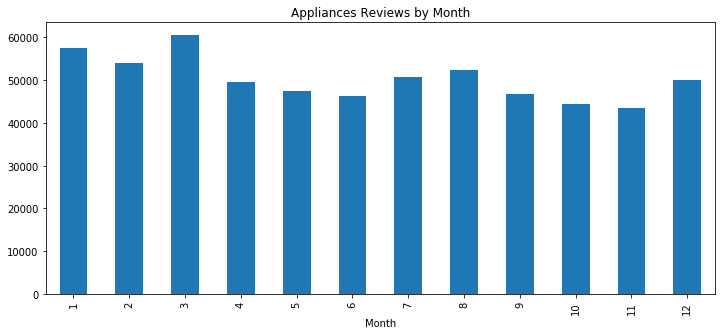

In [88]:
plt.subplots(figsize = (12,5)) 
plt.title('Appliances Reviews by Month')
df_applicances.groupby(['Month']).size().plot(kind='bar');

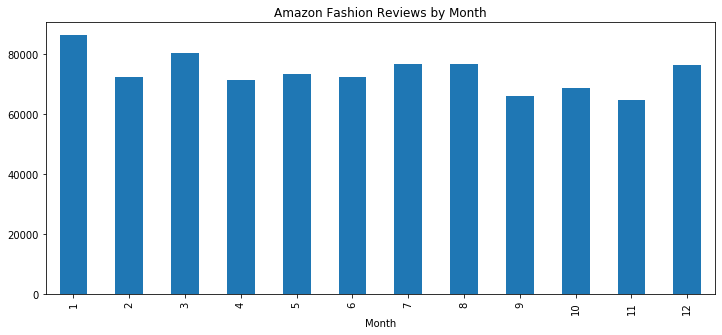

In [89]:
plt.subplots(figsize = (12,5)) 
plt.title('Amazon Fashion Reviews by Month')
df_amazon_fashion.groupby(['Month']).size().plot(kind='bar');

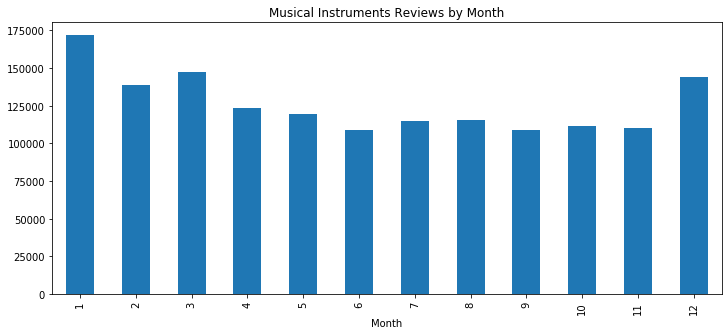

In [90]:
plt.subplots(figsize = (12,5)) 
plt.title('Musical Instruments Reviews by Month')
df_musical_instruments.groupby(['Month']).size().plot(kind='bar');


In [ ]:
### Of Interest:
Some interesting observations:
- Far less variation from the annual distribution, but's that generally to be expected when we lump data points into fewer catagories. 
- Musical Instruments, Applicances, and especially Software stick out at with a greater dip after the first quarter. 

**Hypothesis:** There's a sudden spike in January when reviews are likely posted after the surge of purchases and gift-giving in the holiday season. Next, I'll break it down by month. 


- monthly - done (1-12)
- quarterly - done (1-4)
- a week - done (0-6)
- monthly by day

- yearly growth    - done (2000-2018)



- scale this to several datasets or "markets"

- more types of analysis?

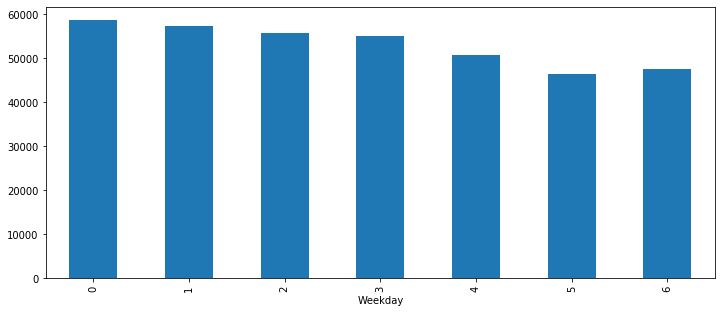

In [34]:
plt.subplots(figsize = (12,5)) 
df_beauty.groupby(['Weekday']).size().plot(kind='bar');

In [35]:
# graph by quarter 

df_beauty['Quarter'] = df_beauty['datetime'].dt.quarter

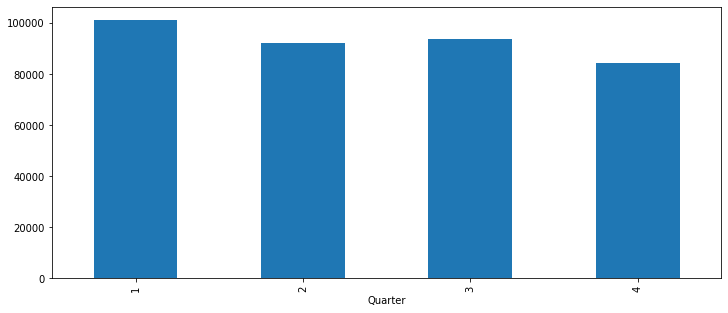

In [36]:
plt.subplots(figsize = (12,5)) 
df_beauty.groupby(['Quarter']).size().plot(kind='bar');

In [37]:
df_beauty.head()

,overall,reviewerName,unixReviewTime,datetime,Weekday,Month,Day,Year,Quarter
0,1.0,theodore j bigham,1424304000,2015-02-19,3,2,19,2015,1
1,4.0,Mary K. Byke,1418860800,2014-12-18,3,12,18,2014,4
2,4.0,David G,1407628800,2014-08-10,6,8,10,2014,3
3,5.0,TamB,1362960000,2013-03-11,0,3,11,2013,1
4,5.0,shoecanary,1324771200,2011-12-25,6,12,25,2011,4


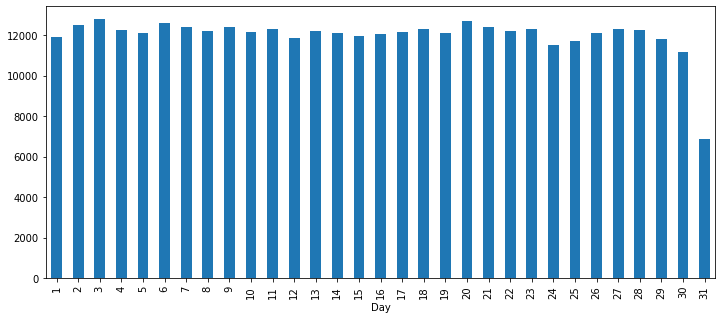

In [16]:
plt.subplots(figsize = (12,5)) 
df.groupby(['Day']).size().plot(kind='bar');

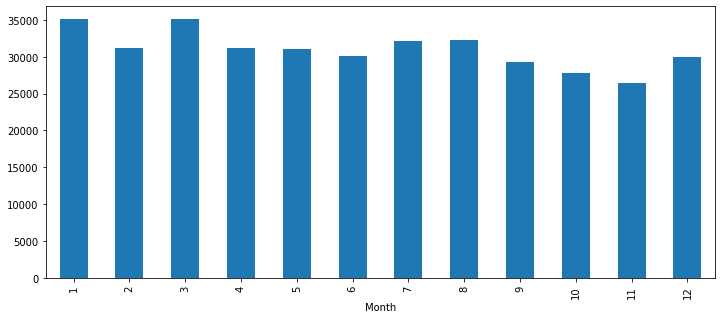

In [10]:
plt.subplots(figsize = (12,5)) 
df.groupby(['Month']).size().plot(kind='bar');

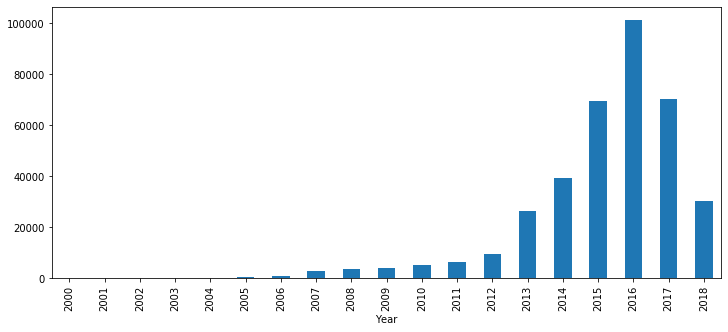

In [13]:
plt.subplots(figsize = (12,5)) 
df.groupby(['Year']).size().plot(kind='bar');